# MNIST - Modified National Institute of Standards and Technology database

## Fetching MNIST data

In [1]:
# fetch_openml fetches data from openml by name or dataset id
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1, cache=True) #cache parameter caches the data using joblib

## Looking into the MNIST data

In [2]:
#the above function returned a bunch (mnist is a dictionary like object with attributes)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
#70000 images and each image has 784 features. 28x28 pixels = 784 features
import numpy as np
X, y = mnist.data.astype(np.int64), mnist.target.astype(np.int64) #can also write mnist.data and mnist.target
X.shape, y.shape

((70000, 784), (70000,))

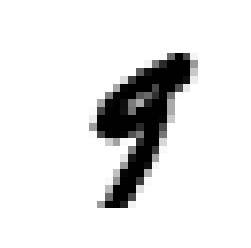

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] #taking a sample data and saving its feature vector
some_digit_image = some_digit.reshape(28,28) #reshaping the feature vector into 28x28 array

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000] #verifies that the above nummber is 9

9

## Splitting the dataset

In [6]:
#MNIST dataset is alreadt split into training(60000) and test(10000) set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#shuffling the training set
## some algorithms are sensitive to order of training instances and they perform poorly if they get many similar instances in a row

#do not run this for the timing
#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary classifications 

In [8]:
#creating target vetors for classification task
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

## A. Stochastic Gradient Descent (SGD Classifier)

sample classifier to identify only one digit (ex - 9). 
we will distinguish between only 2 classes; 9 and not-9

This classifier handles large datasets eficiently. It also deals with the training set independently, one at a time which makes it suitable for online learning

In [9]:
#creating the classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [10]:
sgd_clf.fit(X_train, y_train_9)

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

## B. RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

## Measuring Accuracy of the 2 classifiers

### 1. Using Cross validation

Cross validation is a resampling precodure used to evaluate a machine learning model on a limited data sample. The simple paramter k refers to the number of groups the data should be split into. So the procedure is called k-fold cross validation. The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller. In StatifiedKFold the splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation. The general procedure for cross-validation is - 
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [13]:
#Implementing cross_validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42) #n_splits = k
def splittingData(classifier=sgd_clf):
    for train_index, test_index in skfolds.split(X_train, y_train_9):  #split() generates indices to split the data
        clone_clf = clone(sgd_clf)
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train_9[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train_9[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

In [14]:
splittingData(sgd_clf), splittingData(forest_clf)

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.94935


C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.94935


(None, None)

In [15]:
#using cross_val_score()
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy") #sgd_clf

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.93685, 0.9545 , 0.94935])

In [16]:
cross_val_score(forest_clf, X_train, y_train_9, cv = 3, scoring = "accuracy") #forest_clf

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.9782 , 0.97685, 0.97545])

In [17]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X, y=None):
        return np.zeros((len(X),1),dtype=bool)

In [18]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.8993 , 0.8999 , 0.90335])

Above gives 90% accuracy. It is because only 10% of the images aer 9s, so if it always guesses that the image is nnot 9, then it will be right about 90% of the times. This demonstrates that accuracy is generally not the preferred performance measure for classifiers, especially when the dataset is skewed.

### 2. Using Confusion Matrix

cross_val_predict() is same as cross_val_score() i.e.. performs K fold cross validation but instead of returning the evaluation cost, it returns the prediction it makes on each test fold.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3) #sgd_clf
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv = 3) #forest_clf

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred) #sgd_clf

array([[52841,  1210],
       [ 1976,  3973]], dtype=int64)

- Each row in confusion matrix represents an actual class
- Each column in confusion matrix represents a predicted class.
- The first row considers non-9 images out of which 52841 are true negatives and 1210 are false positives
- The second row considers 9 images out of which 1976 are false negatives and 3973 are true positives

In [ ]:
confusion_matrix(y_train_9, y_train_pred_forest) #forest_clf

array([[53878,   173],
       [ 1217,  4732]], dtype=int64)

### 3. Precision recall 

In [ ]:
#calculating precision and recal
# sgd_clf
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_9, y_train_pred)
recall = recall_score(y_train_9, y_train_pred)
print("Precision:", precision, " Recall:", recall)

Precision: 0.766544472313332  Recall: 0.6678433350142882


From the number it can be said that the algorithm is 
- 77% precise i.e.. it is correct only 77% of the times (correctly detects only 77% of 9s)
- 67% recall i.e.. it only detects 67% of the 9s

In [ ]:
# forest_clf
precision_forest = precision_score(y_train_9, y_train_pred_forest)
recall_forest = recall_score(y_train_9, y_train_pred_forest)
print("Precision", precision_forest, " Recall", recall_forest)

Precision 0.964729867482161  Recall 0.7954278029920995


Precision and Recall of Random Forest Classifier is much better than SGDClassifier

In [ ]:
#combining both precision and recall into a single metric called F1 score. it is a harmonic mean of precision and recall
# F1 score favours classifiers with similar precision and recall
# but that is not the way. Inceasing precision decreases recall - Precision/Recall tradeoff

from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred) #sgd_clf

0.713798059647862

In [ ]:
f1_score(y_train_9, y_train_pred_forest) #forest_clf

0.8719366132301455

In [ ]:
y_scores = sgd_clf.decision_function([some_digit]) #returns a score for each instance provided to it
y_scores #sgd_clf

array([13625.40971728])

In [ ]:
#predictions are made using any threshold based on the scores provided above by decision_function
#sgd_clf

#case 1 : 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
#case 2:
threshold = 200000
y_some_digit_predict = (y_scores > threshold)
y_some_digit_predict

array([False])

The above cases predict that raising the threshold decreases recall. To decide which threshold to use, follow the below steps. From the graph one can select the threshold value that gives the best precision/recall tradeoff

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3, method = "decision_function")

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [ ]:
#forest_clf does not have decision_function.It has predict_proba function

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3, method = "predict_proba")
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0. , 0. , 0.1, ..., 0.1, 0. , 0. ])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_9, y_scores_forest)

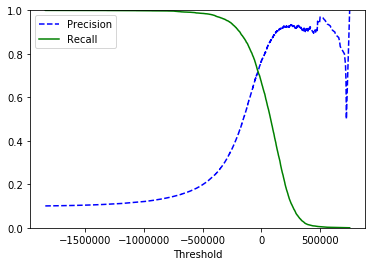

In [ ]:
#plotting precision and recall as a function of threshold using matplotlib

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds) #sgd_clf
plt.show()

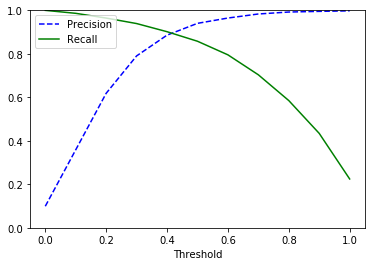

In [ ]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest) #forest_clf
plt.show()

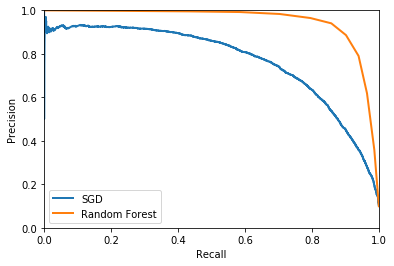

In [ ]:
def plot_precision_vs_recall(precisions, recalls, label=None):
    plt.plot(recalls, precisions, linewidth=2, label=label)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0,1])
    plt.xlim([0,1])

plot_precision_vs_recall(precisions, recalls, "SGD") #sgd_clf
plot_precision_vs_recall(precisions_forest, recalls_forest, "Random Forest") #forest_clf
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_train_pred_90 = (y_scores > 130000) #sgd_clf
precision_score(y_train_9, y_train_pred_90),recall_score(y_train_9, y_train_pred_90)

(0.9027492819039803, 0.3698100521095983)

### 4. ROC Curve
Receiver Operating Characteristic (ROC) curve is used for binary classifiers. It plots True positive rate (recall) against False Positive Rate. 
- FPR = ratio of negative instances incorrectly cclassified as positive i.e.. FP/(FP+TN).
- FPR = 1 - TNR
- TNR = ratio of negative instances that are correctly classified as negative i.e.. TN/(FP+TN)
- TNR is also called 'specificity'
- Therefore, ROC curve plots Sensitivity (Recall) against (1-specificity)


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

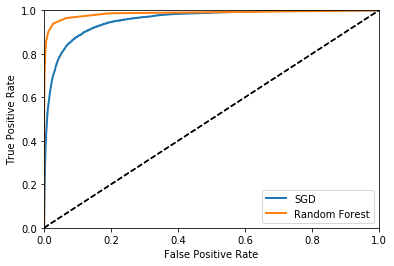

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

The higher the Recall (TPR), higher the FPR. Dotted line is the ROC curve of a pure random classifier. A good classifier stays as far from the line as possible. (towards top left corner).

One way to compare the classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1 whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)  #sgd_clf

0.9563577756834807

ROC curve and PR curve are very similar. To decide which one to use - 
- prefer the PR curve whenever the positive class is rare or when false positives are more important than false negatives.
- prefer ROC curve otherwise. 

In [ ]:
roc_auc_score(y_train_9, y_scores_forest) #forest_clf

0.9860076662746303

## Multiclass Classification

2 strategies for creating a multiclass classifier from binary classifiers
- OvA - One versus all: classify the digits into 10 classes and train 10 binary classifiers, one for each digit. get the decision score from each classifier and select the class which outputs the highest score.
- OvO - One versus one: train the binary classifier for every paair of digits. if there are N classes, then we need to train N(N-1)/2 classifiers.

Support Vector machines scale poorly with the size of training set so for this algorithm OvO is preferred since it is faster to train many algorithms on one training set than to train few classifiers on many large training sets.

For most binary classifiers, OvA is preferred.
    

##### Creating a multiclass classifier from binary classifiers using OvA

In [ ]:
sgd_clf.fit(X_train, y_train) #sgd_clf
sgd_clf.predict([some_digit])

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([9], dtype=int64)

For the above algorithm, under the hood, scikit learn trained 10 binary classifiers and got their decision scores for the image and selected the class with the highest score

##### TO see that scikit learn indeed trains 10 binary classifiers, we use decision_function to return 10 scores, 1 per class

In [ ]:
#sgd_clf

some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-846573.96783425, -334136.90477277, -461748.96543531,
        -197470.29859882,  -94954.78149796, -219741.10518294,
        -846748.06720991, -298928.89337382, -563099.41054912,
          13625.40971728]])

In [ ]:
np.argmax([some_digit_scores])

9

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

##### Forcing the scikit learn to use OneVsOneClassifier or OneVsRestClassifier

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
#sgd_Clf

ovo_sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_sgd_clf.fit(X_train, y_train)
ovo_sgd_clf.predict([some_digit])

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([9], dtype=int64)

In [ ]:
len(ovo_sgd_clf.estimators_)

45

### RandomForestClassifier is a multiclass classifier so Scikit learn does not have to do OvO or OvA

In [ ]:
forest_clf.fit(X_train, y_train) #forest_clf
forest_clf.predict([some_digit])

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([9], dtype=int64)

In [ ]:
#forest_clf

some_digit_scores_forest = forest_clf.predict_proba([some_digit])
some_digit_scores_forest

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
np.argmax([some_digit_scores_forest])

9

### Evaluating these classifiers

In [ ]:
#sgd_clf
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.86872625, 0.87639382, 0.87848177])

In [ ]:
#forest_clf
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.94116177, 0.93949697, 0.94374156])

### Improving the accuracy of sgd_clf

In [ ]:
#Accuracy is improved by scaling the inputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.90736853, 0.90884544, 0.91363705])

### Error Analysis to improve the performance of the model

##### Confusion Matrix

In [ ]:
#sgd_clf

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred)
conf_mx_sgd

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]],
      dtype=int64)

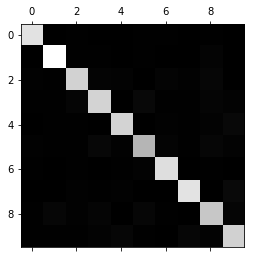

In [ ]:
plt.matshow(conf_mx_sgd, cmap=plt.cm.gray)
plt.show()

In [ ]:
#focussing on the errors - 
## each value  in the confusion matrix is divided by the number of images in the corresponding class.
## this helps us in comparing the error rates instead of absolute number of errors.

row_sums = conf_mx_sgd.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx_sgd / row_sums

In [ ]:
#filling the diagonals with 0 to keep only the errors and plotting the result

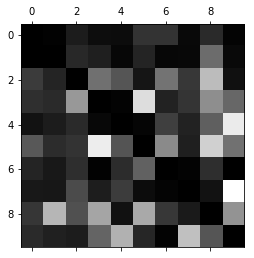

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Rows represent the actual classes and columns represent the predicted classes. 

- The columns for class 8 and 9 are quite bright -> many images get misclassified as 8s or 9s
- The rows for class 8 and 9 are quite bright -> 8s and 9s are often confused with other digits

In [ ]:
#Analyzing individual errors of 3's and 5's
clf_three, clf_five = 3, 5
X_three = X_train[(y_train == clf_three) & (y_train_pred == clf_three)]
X_threefive = X_train[(y_train == clf_three) & (y_train_pred == clf_five)] #Is 3 but predicted 5
X_fivethree = X_train[(y_train == clf_five) & (y_train_pred == clf_three)] #Is 5 but predicted 3
X_five = X_train[(y_train == clf_five) & (y_train_pred == clf_five)]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")  

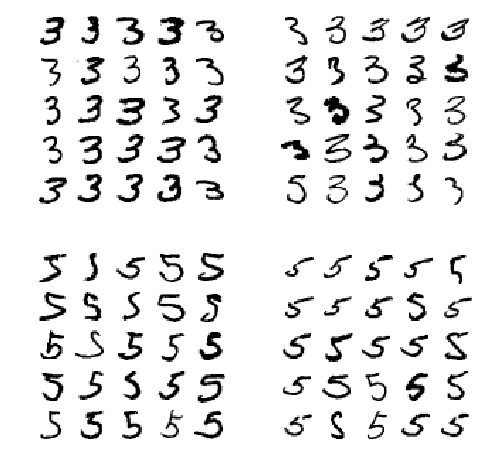

In [ ]:
#Plotting the images
plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_three[:25], images_per_row = 5) #top left plot
plt.subplot(222); plot_digits(X_threefive[:25], images_per_row = 5) #top right plot
plt.subplot(223); plot_digits(X_fivethree[:25], images_per_row = 5) #bottom left plot
plt.subplot(224); plot_digits(X_five[:25], images_per_row = 5) #bottom right plot
plt.show()

Two 5x5 blocks on left shoe digits classified as 3 and teo 5x5 blocks on right show digits classified as 5.

## Multilabel classification

This clssification outputs multiple binary labels

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

kmn_clf = KNeighborsClassifier()
kmn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
kmn_clf.predict([some_digit]) #predicts 2 labels according to the 2 conditions we gave above

array([[ True,  True]])

In [ ]:
#computing avergae F1 score across all labels

y_train_kmn_pred = cross_val_predict(kmn_clf, X_train, y_train, cv = 3)
f1_score(y_train, y_train_kmn_pred, average = "macro")

#giving each label a weight equal to its support ( i.e.. number of instances with that target label)
#f1_score(y_train, y_train_kmn_pred, average = "weighted")

## Multioutput Classification

Generalization of multilabel classification where each label can be a multiclass.

This classifiers output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255)

In [ ]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
kmn_clf.fit(X_train_mod, y_train_mod)
clean_digit = kmn_clf.predict([X_test_mood[some_index]])
plot_digit(clean_digit)